In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os

2023-03-02 00:12:59.411387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
base_dir = '/Users/shatha_95/Desktop/naja-dataset-master/dataset-5000'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [3]:
os.listdir('/Users/shatha_95/Desktop/naja-dataset-master/dataset-5000/train')
os.listdir('/Users/shatha_95/Desktop/naja-dataset-master/dataset-5000/val')

['nonhijab', 'hijab']

In [4]:
train_nonhijab_dir = os.path.join(train_dir, 'nonhijab')
train_hijab_dir = os.path.join(train_dir, 'hijab')
 
validation_nonhijab_dir = os.path.join(validation_dir, 'nonijab')
validation_hijab_dir = os.path.join(validation_dir, 'hijab')

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  zoom_range=0.2,
  shear_range=0.2,  
  horizontal_flip=True)

test_datagen = ImageDataGenerator(
  rescale=1./255, 
  zoom_range=0.2, 
  shear_range=0.2, 
  horizontal_flip=True) 

In [6]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(224, 224),
  batch_size=32, 
  color_mode='rgb', #
  class_mode='binary', 
  shuffle = True, 
  seed=42) 
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='binary',
  shuffle = True,
  seed=42)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
sample_images_train, _ = next(train_generator)
sample_images_val, _ = next(validation_generator)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-03-02 00:16:39.066931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
result = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=15, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/15
25/25 [==============================] - 69s 3s/step - loss: 0.7282 - accuracy: 0.5200 - val_loss: 0.6564 - val_accuracy: 0.5000
Epoch 2/15
25/25 [==============================] - 71s 3s/step - loss: 0.5788 - accuracy: 0.6737 - val_loss: 0.4829 - val_accuracy: 0.6875
Epoch 3/15
25/25 [==============================] - 73s 3s/step - loss: 0.4350 - accuracy: 0.7987 - val_loss: 0.3249 - val_accuracy: 0.8625
Epoch 4/15
25/25 [==============================] - 69s 3s/step - loss: 0.3967 - accuracy: 0.8288 - val_loss: 0.2260 - val_accuracy: 0.9250
Epoch 5/15
25/25 [==============================] - 76s 3s/step - loss: 0.3016 - accuracy: 0.8737 - val_loss: 0.1614 - val_accuracy: 0.9563
Epoch 6/15
25/25 [==============================] - 87s 3s/step - loss: 0.2704 - accuracy: 0.8900 - val_loss: 0.1962 - val_accuracy: 0.9438
Epoch 7/15
25/25 [==============================] - 71s 3s/step - loss: 0.2355 - accuracy: 0.9112 - val_loss: 0.1397 - val_accuracy: 0.9625
Epoch 8/15
25/25 [==

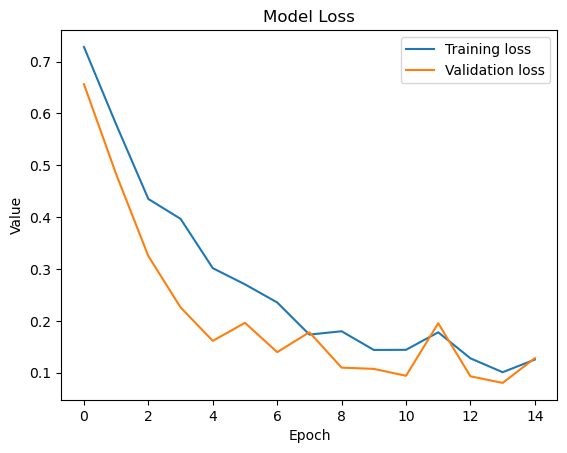

In [12]:
#Loss Plot
from matplotlib import pyplot as plt

plt.plot(result.history['loss'], label ='Training loss')
plt.plot(result.history['val_loss'], label = 'Validation loss')
plt.title('Model Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

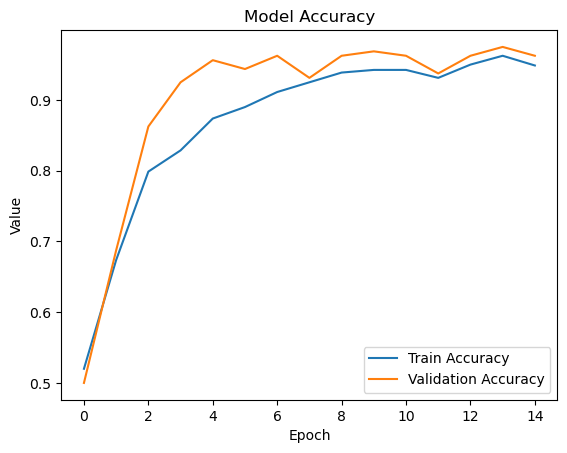

In [13]:
#Accuracy Plot
plt.plot(result.history['accuracy'], label = 'Train Accuracy')
plt.plot(result.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [32]:
from tensorflow.keras.utils import load_img

In [35]:
import keras.utils as image1

1/1 [==============================] - 0s 45ms/step
with hijab


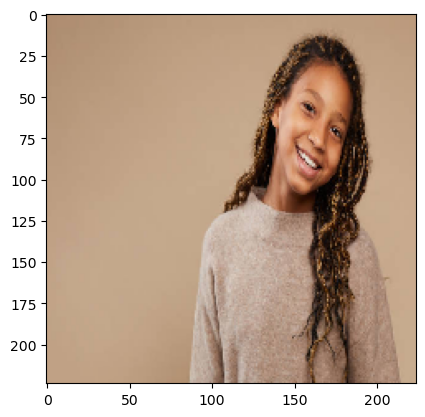

In [47]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
path = '/Users/shatha_95/Desktop/istockphoto-1285993433-612x612.jpg'
img = load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = image1.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = model.predict(images, batch_size=32)
if classes == 0:
    print('with hijab')
else:
    print('without hijab')